In [2]:
def read_floats(path):
    """
        Reads a file into a list of floats.
    """
    with open(file=path, mode='r') as file:
        float_list = list(map(float, file))
        return float_list


(512, 512)
Aspect ratio = 1.0
w = 2.5, h = 2.5


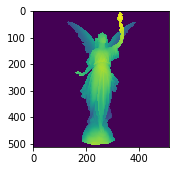

In [11]:
#!/usr/bin/env python
#   Copyright (c) 2017
#   All Rights Reserved.
#

"""

.. module:: Viewer
   :synopsis: Displays a raw DepthBuffer.

.. moduleauthor:: Steve Knipmeyer <steve@knipmeyer.org>

"""
import numpy as np
import os.path
import matplotlib.pylab as plt


def plot_image(image, height=8, **kwargs):
    """
    Helper function to plot an image.
    Dimensions are in inches.
    """
    
    y_length = image.shape[0]
    x_length = image.shape[1]
    aspect_ratio = x_length / y_length
    width = aspect_ratio * height
    print ('Aspect ratio = {}'.format(aspect_ratio))
    print ("w = {}, h = {}".format (width, height))

    plt.figure(figsize=(width, height))
    plt.imshow(image, interpolation="none", **kwargs)

def image_from_file():
    """
    Load an image from an image file.
    """
    current_directory = os.path.dirname(os.curdir)
    file_name = os.path.join(current_directory, "Lucy.png")
    image = plt.imread(file_name)
    return image

def image_from_floats():
    """
    Load an image from a file of single precision floats.
    """
    file_name = os.path.abspath(r"D:\Users\Steve Knipmeyer\Documents\GitHub\ModelRelief\Solver\Test\Working\lucy.raw.floats.1.000000")
    floats = read_floats(file_name)
    
    # transform 2D        
    a = np.array(floats)
    shape = a.shape
    a = np.reshape(a, (512, 512))
    shape = a.shape

    # flip; first DB row is at minimum Y
    a = np.flipud(a)

    # invert depths; brighter values are higher offsets from mesh plane
    inverter = lambda v: abs(1 - v)
    a = inverter(a)
        
    return a
    
def main():
    """
    Main entry point.
    """
    image = image_from_floats()

    print(image.shape)
    plot_image(image, 2.5)
    plt.show()

main()